In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from sklearn.metrics import r2_score
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import matplotlib.pyplot as plt

#get the training and testing data, use the id column of the test set as the index
X = pd.read_csv('Xdata(with iffy).csv')
X=X.set_index('Series Name')

y = pd.read_csv('ydata.csv')
y = y.set_index('Series Name')

In [ ]:
#preprocessing - removing un-needed columns
xtrain = X.drop(columns = ['2020 [YR2020]', '2019 [YR2019]','2018 [YR2018]','2017 [YR2017]','2016 [YR2016]','2015 [YR2015]','2014 [YR2014]','2013 [YR2013]','1969 [YR1969]','1968 [YR1968]','1967 [YR1967]','1966 [YR1966]','1965 [YR1965]','1964 [YR1964]','1963 [YR1963]','1962 [YR1962]','1961 [YR1961]','1960 [YR1960]'])
ytrain = y.drop(columns = ['2020 [YR2020]', '2019 [YR2019]','2018 [YR2018]','2017 [YR2017]','2016 [YR2016]','2015 [YR2015]','2014 [YR2014]','2013 [YR2013]','1969 [YR1969]','1968 [YR1968]','1967 [YR1967]','1966 [YR1966]','1965 [YR1965]','1964 [YR1964]','1963 [YR1963]','1962 [YR1962]','1961 [YR1961]','1960 [YR1960]'])

years=xtrain.columns
vals = ytrain

#transpose the data to make it into the correct shape
Xtrain = xtrain.transpose()
print(Xtrain.shape)
ytrain = ytrain.transpose()
print(ytrain.shape)



(43, 75)
(43, 1)


In [ ]:
#fill missing values with the median of the row
simpIm=SimpleImputer(missing_values = np.nan, strategy='median')
Xtrain=simpIm.fit_transform(Xtrain)
ytrain =simpIm.fit_transform(ytrain)

#standardize the data
stan = StandardScaler()
Xtrain=stan.fit_transform(Xtrain)
ytrain =stan.fit_transform(ytrain)

#train and Test Split with 10% test data
x_train, x_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=0.1)
y_test = np.squeeze(y_test)
y_train = np.squeeze(y_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(38, 75)
(5, 75)
(38,)
(5,)


In [ ]:
#LSTM model - with 2 lstm layers and 1 dense layer

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

x = keras.Input(75)

x_seq = tf.expand_dims(x, [-1])

lstm1 = LSTM(25, return_sequences=True)(x_seq)
lstm2 = LSTM(50, return_sequences=True)(lstm1)
flat = Flatten()(lstm2)

ds = keras.layers.Dense(1, activation=tf.nn.relu)(flat)

lstmModel = keras.Model(x, ds)

#compile the model, use mean square error for loss and adam for gradient descent
lstmModel.compile(
      loss='mse',
      optimizer='adam',
      )

lstmModel.summary()


/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 75)]              0         
_________________________________________________________________
tf.expand_dims_16 (TFOpLambd (None, 75, 1)             0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 75, 25)            2700      
_________________________________________________________________
lstm_33 (LSTM)               (None, 75, 50)            15200     
_________________________________________________________________
flatten_16 (Flatten)         (None, 3750)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 3751      
Total params: 21,651
Trainable params: 21,651
Non-trainable params: 0
______________________________________________________

In [ ]:
#fit the model to the data using 10 epochs and a batch size of 2
history = lstmModel.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
15/15 [==============================] - 3s 54ms/step - loss: 1.0128 - val_loss: 0.4242
Epoch 2/10
15/15 [==============================] - 0s 10ms/step - loss: 0.7710 - val_loss: 0.4800
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 0.6873 - val_loss: 0.4434
Epoch 4/10
15/15 [==============================] - 0s 9ms/step - loss: 0.8272 - val_loss: 0.4630
Epoch 5/10
15/15 [==============================] - 0s 9ms/step - loss: 0.5857 - val_loss: 0.6047
Epoch 6/10
15/15 [==============================] - 0s 9ms/step - loss: 0.7191 - val_loss: 0.5173
Epoch 7/10
15/15 [==============================] - 0s 9ms/step - loss: 0.6808 - val_loss: 0.5832
Epoch 8/10
15/15 [==============================] - 0s 9ms/step - loss: 0.7345 - val_loss: 1.0044
Epoch 9/10
15/15 [==============================] - 0s 9ms/step - loss: 0.7336 - val_loss: 0.8219
Epoch 10/10
15/15 [==============================] - 0s 9ms/step - loss: 0.6254 - val_loss: 0.7154


In [ ]:
#predict the values for the test data
#use r-squared to evaluate the fit
from sklearn.metrics import r2_score
y_pred=lstmModel.predict(x_test)
r2_score(y_test,y_pred)

0.5732698970352901

[[0.        ]
 [1.3617976 ]
 [0.        ]
 [0.        ]
 [0.62099004]]
[-0.88473031  1.16068454 -0.08792021  0.47673811  0.7271556 ]


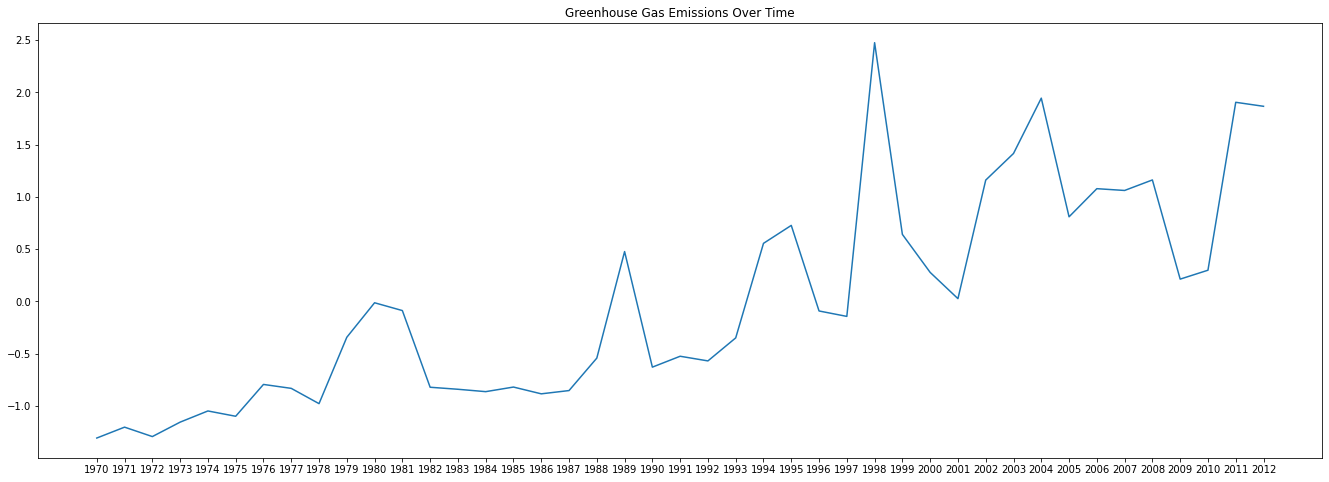

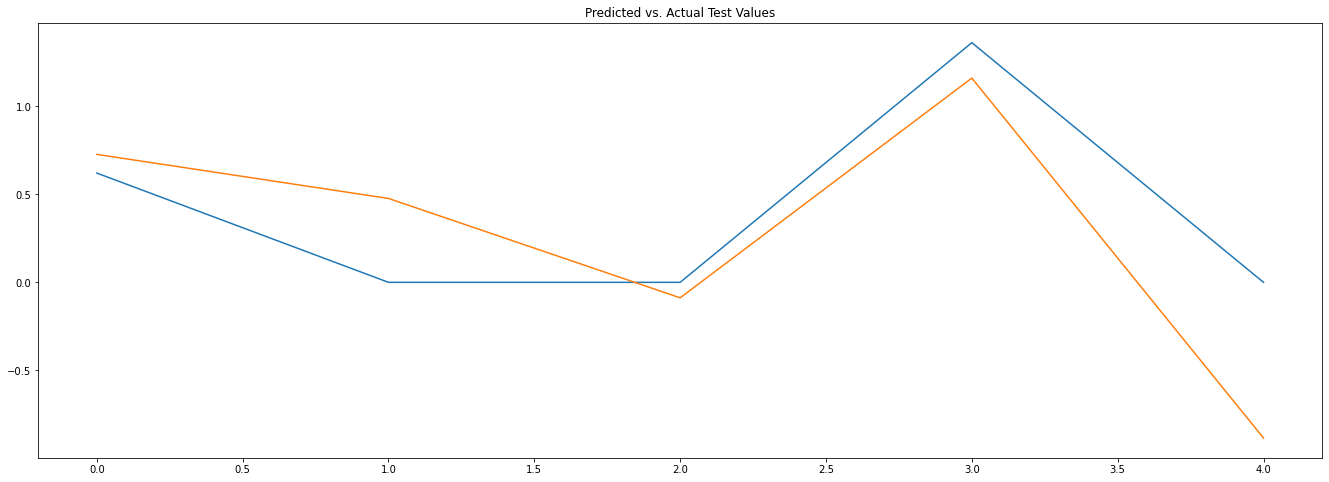

In [ ]:
#make a graph showing the y data over time
plt.figure(figsize=(23,8))
plt.plot(np.flip(years),np.flip(ytrain,axis=0))
plt.title('Greenhouse Gas Emissions Over Time')

#make a graph showing actual test y data vs the predicted y data
plt.figure(figsize=(23,8))
plt.plot([0,1,2,3,4],np.flip(y_pred, axis=0), np.flip(y_test, axis=0))
plt.title('Predicted vs. Actual Test Values')
plt.show()
